In [597]:
%matplotlib inline

In [598]:
import matplotlib.pyplot as plt
import geopandas

In [599]:
america = geopandas.read_file("data/america_initpoint")
america.head(5)

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06658, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85914 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.6682, -99.83068 48.6681..."


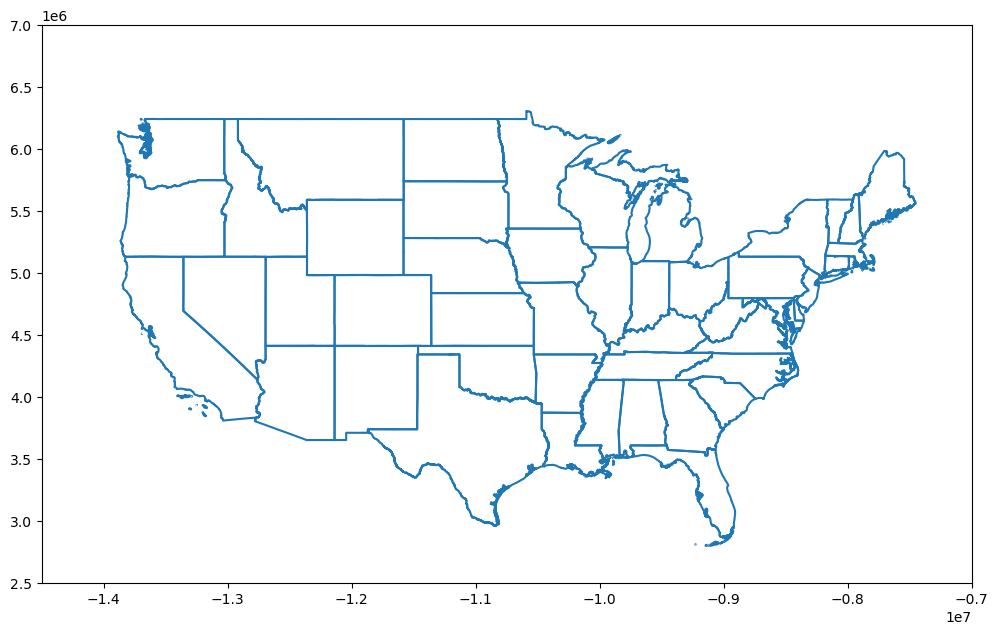

In [600]:
states = america.dissolve(by="STUSPS")
states = states.to_crs("EPSG:3395")

fig, ax = plt.subplots(figsize=(12, 16))

ax.set_xlim(-14500000, -7000000)
ax.set_ylim(2500000, 7000000)

states.boundary.plot(ax=ax)

plt.show()

In [601]:
tornados = geopandas.read_file("data/tornado_initpoint")
tornados = tornados.to_crs("EPSG:3395")

In [602]:
tornados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63645 entries, 0 to 63644
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   om        63645 non-null  int64   
 1   yr        63645 non-null  int64   
 2   mo        63645 non-null  int64   
 3   dy        63645 non-null  int64   
 4   date      63645 non-null  object  
 5   time      63645 non-null  object  
 6   tz        63645 non-null  int64   
 7   st        63645 non-null  object  
 8   stf       63645 non-null  int64   
 9   stn       63645 non-null  int64   
 10  mag       63645 non-null  int64   
 11  inj       63645 non-null  int64   
 12  fat       63645 non-null  int64   
 13  loss      63645 non-null  float64 
 14  closs     63645 non-null  float64 
 15  slat      63645 non-null  float64 
 16  slon      63645 non-null  float64 
 17  elat      63645 non-null  float64 
 18  elon      63645 non-null  float64 
 19  len       63645 non-null  float64 
 20

In [603]:
tornados.head(5)

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,POINT (-10043244.459 4662018.86)
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,POINT (-9940830.528 4709053.526)
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,POINT (-9415402.531 4966686.373)
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,POINT (-10505220.346 4058499.57)
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,POINT (-10094451.425 4496998.866)


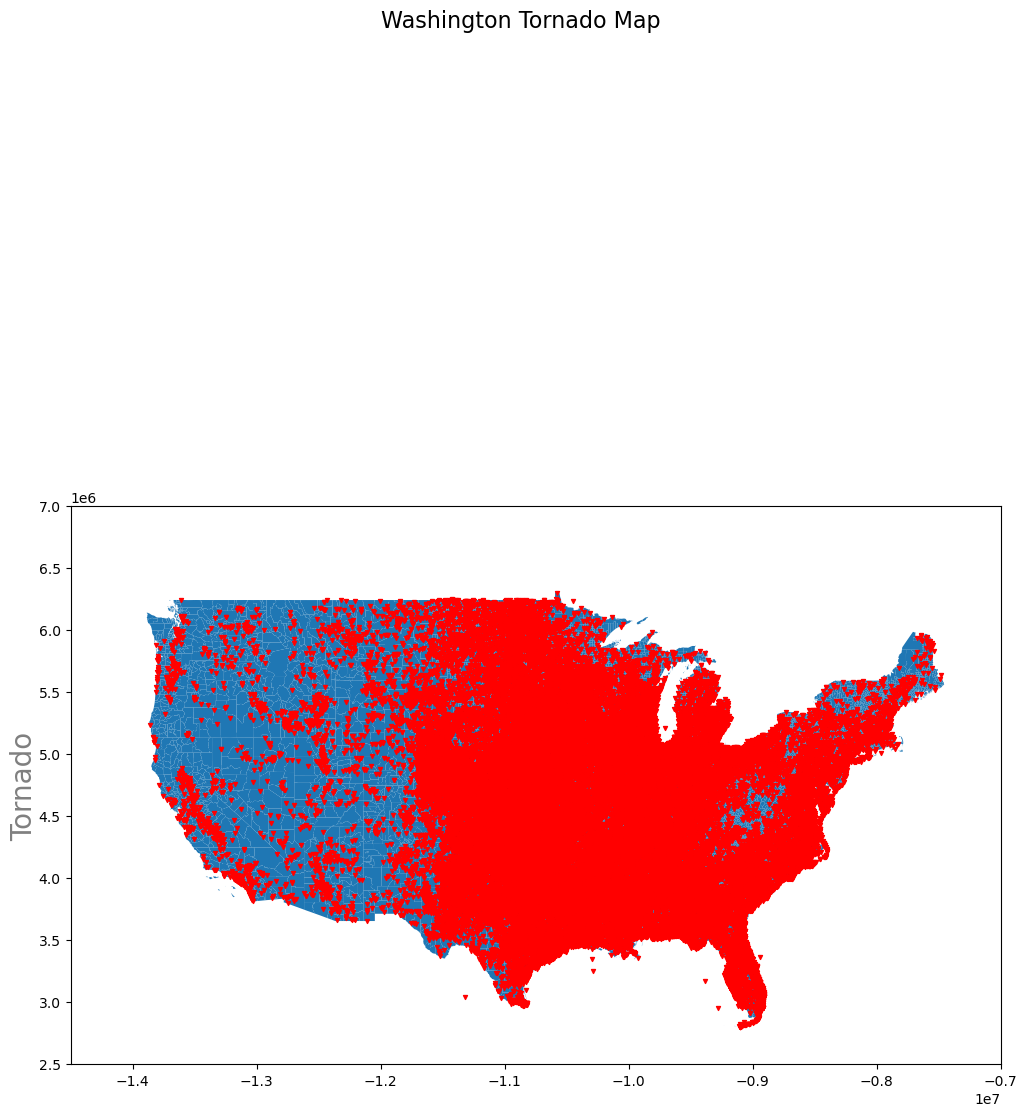

In [604]:
areas = america.to_crs("EPSG:3395")

fig = plt.figure(1, figsize=(12, 16)) 
ax = fig.add_subplot()

ax.set_xlim(-14500000, -7000000)
ax.set_ylim(2500000, 7000000)

fig.suptitle("Washington Tornado Map", fontsize=16)

areas.plot(ax=ax, linewidth=.8)

tornados.plot(ax=ax, color='red', marker='v', markersize=8)
ax.text(-0.05, 0.5, 'Tornado', transform=ax.transAxes,
        fontsize=20, alpha=0.5,
        ha='center', va='center', rotation=90)

plt.show()

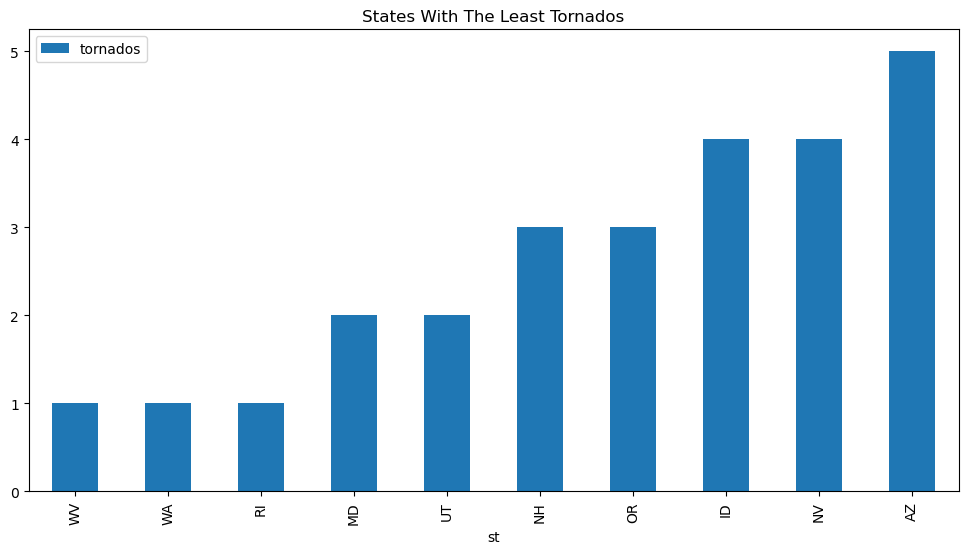

In [605]:
twisters_by_state = tornados.copy()

twisters_by_state = twisters_by_state[twisters_by_state["yr"] == 2018]

twisters_by_state['tornados'] = 1

twisters_by_state = twisters_by_state[['st','tornados']].groupby('st').count()

twisters_by_state.sort_values('tornados', ascending=True)[:10].plot.bar(figsize=(12,6), title='States With The Least Tornados')

plt.show()

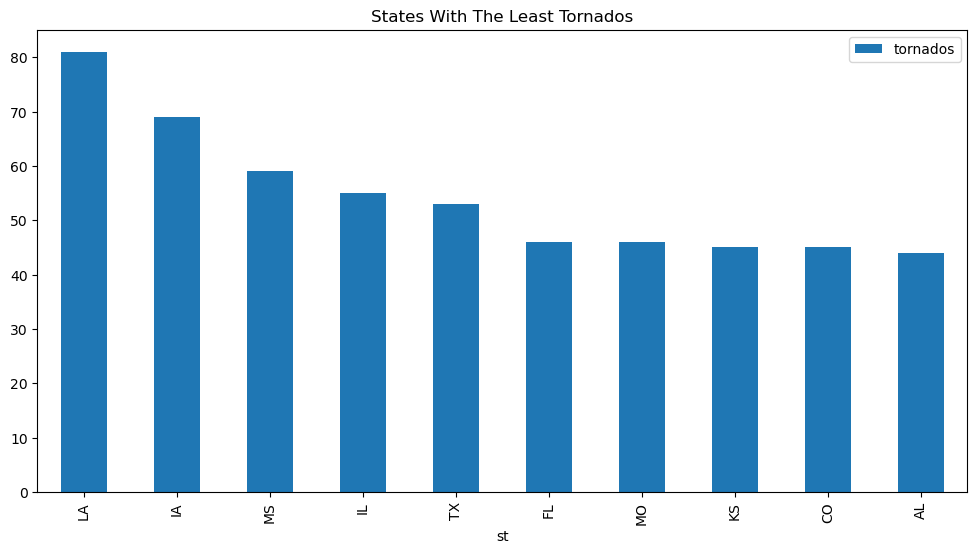

In [606]:
twisters_by_state = tornados.copy()

twisters_by_state = twisters_by_state[twisters_by_state["yr"] == 2018]

twisters_by_state['tornados'] = 1

twisters_by_state = twisters_by_state[['st','tornados']].groupby('st').count()

twisters_by_state.sort_values('tornados', ascending=False)[:10].plot.bar(figsize=(12,6), title='States With The Least Tornados')

plt.show()

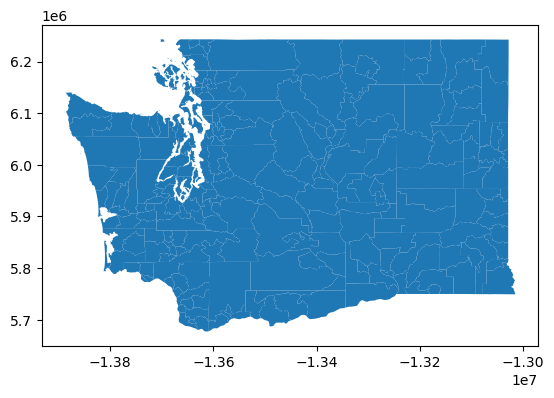

In [626]:
washington_map = areas[areas["STUSPS"] == 'WA']
washington_map.plot()

plt.show()

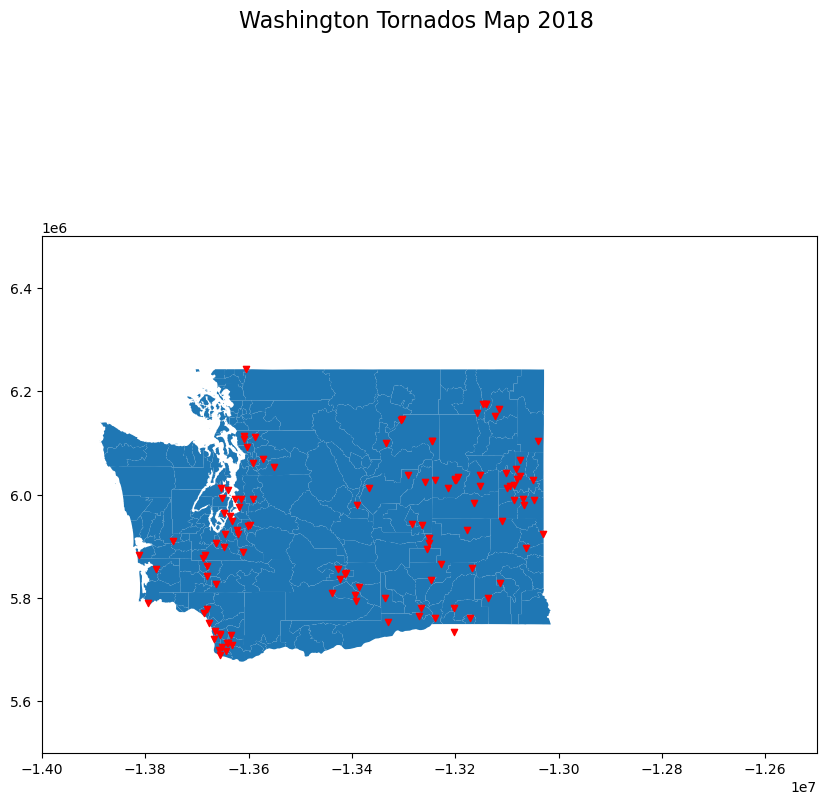

In [636]:
washington_twisters = tornados[tornados["st"] == "WA"]

fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()

ax.set_xlim(-14000000, -12500000)
ax.set_ylim(5500000, 6500000)

fig.suptitle('Washington Tornados Map 2018', fontsize=16)

washington_map.plot(ax=ax, linewidth=.8)

washington_twisters.plot(ax=ax, color='red', marker='v', markersize=20)

plt.show()